In [ ]:
#including libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
import seaborn as sns


dataset = pd.read_csv('/content/loop2.csv')
# reading dataset head
print(len(dataset))
print(dataset.head())

5000
   gender  easy_midterm  medium_midterm  hard_midterm  midterm_score  \
0       1             0               0             7              7   
1       2             0              19             0             19   
2       2             0               0             5              5   
3       1             0               0            15             15   
4       2             0               0             2              2   

   easy_final  medium_final  hard_final  final_score  total_score  \
0           0            14           0           14           21   
1           0             0          10           10           29   
2           8             0           0            8           13   
3           0             0           2            2           17   
4           9             0           0            9           11   

   father_education  location  is_cleared  
0                 0         1           1  
1                 0         2           1  
2              

In [ ]:
print('shape',dataset.shape)


shape (5000, 13)


In [ ]:
#split the dataset

X=dataset.iloc[:, 0:40]
y=dataset.iloc[: , -1]
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=1243 , test_size=0.2)
len(X_test)

# Checking the length of the test set
print("Number of samples in the test set:", len(X_test))
print(X_train.dtypes)






Number of samples in the test set: 1000
gender              int64
easy_midterm        int64
medium_midterm      int64
hard_midterm        int64
midterm_score       int64
easy_final          int64
medium_final        int64
hard_final          int64
final_score         int64
total_score         int64
father_education    int64
location            int64
is_cleared          int64
dtype: object


In [ ]:
# scalling the datset traning and testing datset

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
import pandas as pd

# Investigate the type of y_train
print(type(y_train))

# Convert y_train to a pandas Series
y_train = pd.Series(y_train)

# Print the size of y_train
print('y train size',y_train.size)

print('y train',y_train)

print(type(y_train[0]))


# Convert X_train to a pandas DataFrame
X_train = pd.DataFrame(X_train)



<class 'pandas.core.series.Series'>
y train size 4000
y train 947     1
4657    2
4282    1
824     1
32      1
       ..
3754    2
4186    0
4066    2
7       2
3843    0
Name: is_cleared, Length: 4000, dtype: int64
<class 'numpy.int64'>


In [ ]:
# define the model KNN
classifier = KNeighborsClassifier(n_neighbors=1, p=2 , metric='euclidean')
print(classifier)
print('classifier:', classifier.n_neighbors)

# Check the number of test samples
print("Number of test samples:", X_test.shape[0])
classifier.fit(X_train, y_train)
# Evaluate the classifier on the test set
accuracy = classifier.score(X_test, y_test)
print("Accuracy on test set:", accuracy)



KNeighborsClassifier(metric='euclidean', n_neighbors=1)
classifier: 1
Number of test samples: 1000
Accuracy on test set: 0.946


In [ ]:
# fit model using classifier  model
classifier.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto' , leaf_size=100 , metric='euclidean',
            metric_params=None, n_jobs=1 , n_neighbors=1 , p=2 )

print(y_test.index.dtype)




int64


In [ ]:
# Use the trained classifier to make predictions on the test set
y_pred = classifier.predict(X_test)
y_test = y_test.reset_index(drop=True).astype(int)

# Print the predicted target values
print("Predicted target values:", y_pred)


# Compare the predicted values to the actual values
print("Predicted vs. Actual:")
for i in range(len(y_pred)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

Predicted target values: [1 2 2 0 1 1 0 0 2 1 2 0 1 1 1 2 1 2 2 1 1 2 1 1 2 1 2 1 1 2 0 0 0 0 1 0 0
 2 2 2 2 0 2 0 1 0 1 2 0 1 1 1 1 1 2 1 1 0 0 2 1 1 1 1 0 2 2 1 1 1 2 2 0 0
 0 0 0 1 1 1 2 2 1 0 1 1 1 2 1 1 0 1 1 1 1 0 0 1 2 1 0 0 0 1 0 2 1 1 0 1 1
 2 2 1 2 0 2 0 2 2 0 2 1 0 0 0 1 1 1 2 1 0 2 2 1 2 1 1 2 1 1 2 2 1 1 0 2 2
 2 1 1 0 0 1 2 2 0 1 1 1 2 0 0 2 2 1 1 1 2 0 2 1 2 2 1 1 2 0 1 0 2 1 0 0 0
 2 2 0 2 1 1 1 1 1 1 2 2 1 1 0 1 1 1 1 1 1 2 2 1 0 2 0 0 0 1 1 1 0 2 0 2 2
 0 1 2 1 2 0 2 2 2 2 0 2 2 2 1 1 1 0 1 2 1 1 1 1 2 1 2 0 1 2 1 0 1 1 2 0 1
 1 0 1 0 1 2 2 0 2 2 1 2 1 0 0 2 1 1 0 0 1 1 0 2 1 0 1 2 1 1 1 1 1 0 1 1 0
 1 2 2 2 0 2 2 2 2 2 1 2 1 1 1 0 2 1 2 2 2 2 2 0 0 2 1 2 2 0 0 2 0 0 2 1 2
 1 0 2 1 1 0 0 1 2 0 1 0 0 1 1 0 1 2 0 0 2 0 1 1 0 0 0 1 1 0 1 2 1 1 2 0 1
 0 1 1 0 2 1 2 0 0 1 1 2 0 2 1 1 2 0 0 1 2 2 1 2 2 1 1 1 0 1 2 1 1 1 2 2 1
 1 2 0 1 1 0 2 2 1 2 0 1 1 0 2 0 1 0 2 1 2 1 2 2 1 0 0 1 2 2 2 0 2 1 0 1 1
 0 0 0 1 0 2 0 2 1 1 1 1 0 2 2 0 2 1 1 0 0 2 1 1 1 2 0 0 0 0 2 0 1 1 2 2 2


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred , average='weighted')  # Use 'weighted' for multi-class problems

# Print the F1 score
print("F1 Score:", f1)

precision = precision_score(y_test, y_pred , average='weighted')
recall = recall_score(y_test, y_pred  , average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")




Confusion Matrix:
[[290  19   0]
 [ 11 336  13]
 [  0  11 320]]
F1 Score: 0.9460625637627056
Precision: 0.9462775225527799
Recall: 0.946204010598461
Accuracy: 0.946


In [ ]:
print(accuracy_score(y_test, y_pred))

0.59


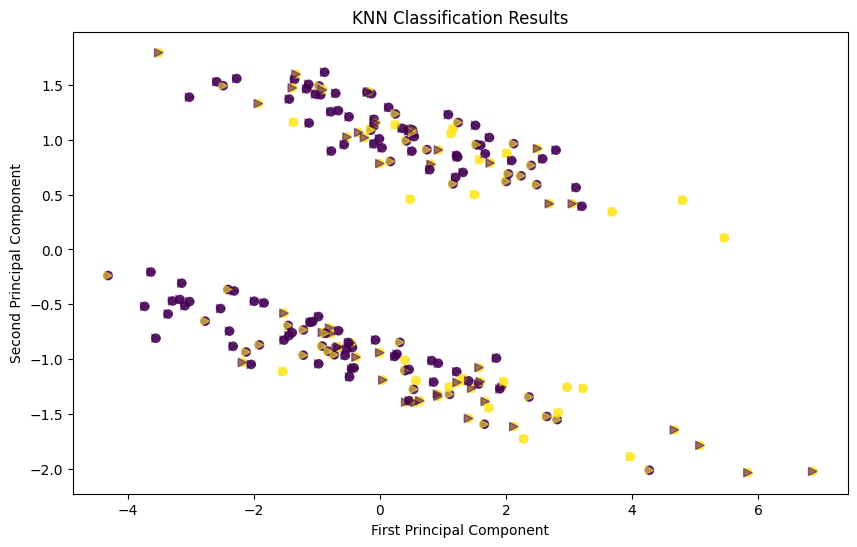

In [ ]:
# ploting the classified data using a matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

# Plot the test set results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.5, marker='>')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KNN Classification Results')
plt.show()

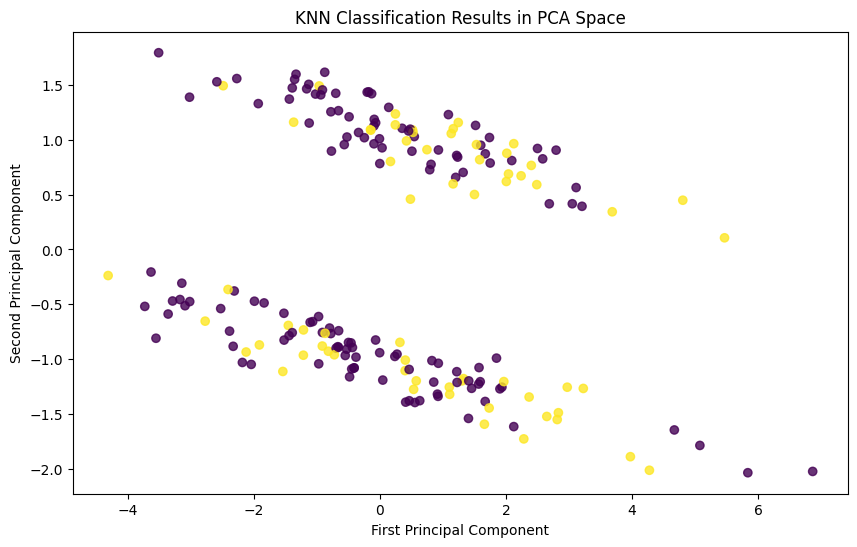

Proportion of Each Class in the First Two Principal Components:
Class 1: 68.00%
Class 2: 32.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_test_pca, y_pred, and y_test are already defined

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.8)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KNN Classification Results in PCA Space')
plt.show()

# Calculate the proportion of each class in the first two principal components
unique_labels, counts = np.unique(y_pred, return_counts=True)
class_proportions = dict(zip(unique_labels, counts))

print("Proportion of Each Class in the First Two Principal Components:")
for label, proportion in class_proportions.items():
    print(f"Class {label}: {proportion / len(y_pred) * 100:.2f}%")


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 13)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")




Best Parameters: {'n_neighbors': 12}
Best Score: 0.666
